In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
img_bgr = cv2.imread('lena.jpeg',1)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

In [3]:
def linear_filters(img , Filter):
    
    h,w=img.shape
    bordered_img = np.zeros((h+2,w+2) , dtype=np.uint8)
    bordered_img[ 1:h+1 , 1:w+1 ] = img

    kernel = 0
    match Filter:
        case 'blur':
            Kernel=np.ones((3,3))/9 
        case 'sharp':
            Kernel=np.array([[0,0,0],[0,2,0],[0,0,0]]) -( np.ones((3,3))/9)
        case 'Gx':
            Kernel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) 
        case 'Gy' : 
            Kernel=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
        case 'Gaussian':
            Kernel=np.array([[0.075, 0.125, 0.075],[0.125, 0.200, 0.125],[0.075, 0.125, 0.075]])
        case _:
            raise ValueError("The value of argument Filter is wrong")

    filtered_img = np.zeros_like(img)
    for i in range(1,h+1):
        for j in range(1,w+1):
            window = bordered_img[ i-1:i+2 , j-1:j+2 ]
            matrix = Kernel * window
            avg = np.sum(matrix)//2
            filtered_img[i-1,j-1] = max(0 , min(255 , avg))
    return filtered_img
    

In [4]:
def Sobel_filter(img):
    Gx = linear_filters(img , 'Gx').astype(np.int64)
    Gy = linear_filters(img , 'Gy').astype(np.int64)
    G = np.clip(np.sqrt(Gx**2 + Gy**2) , 0 ,255)
    return G.astype(np.uint8)

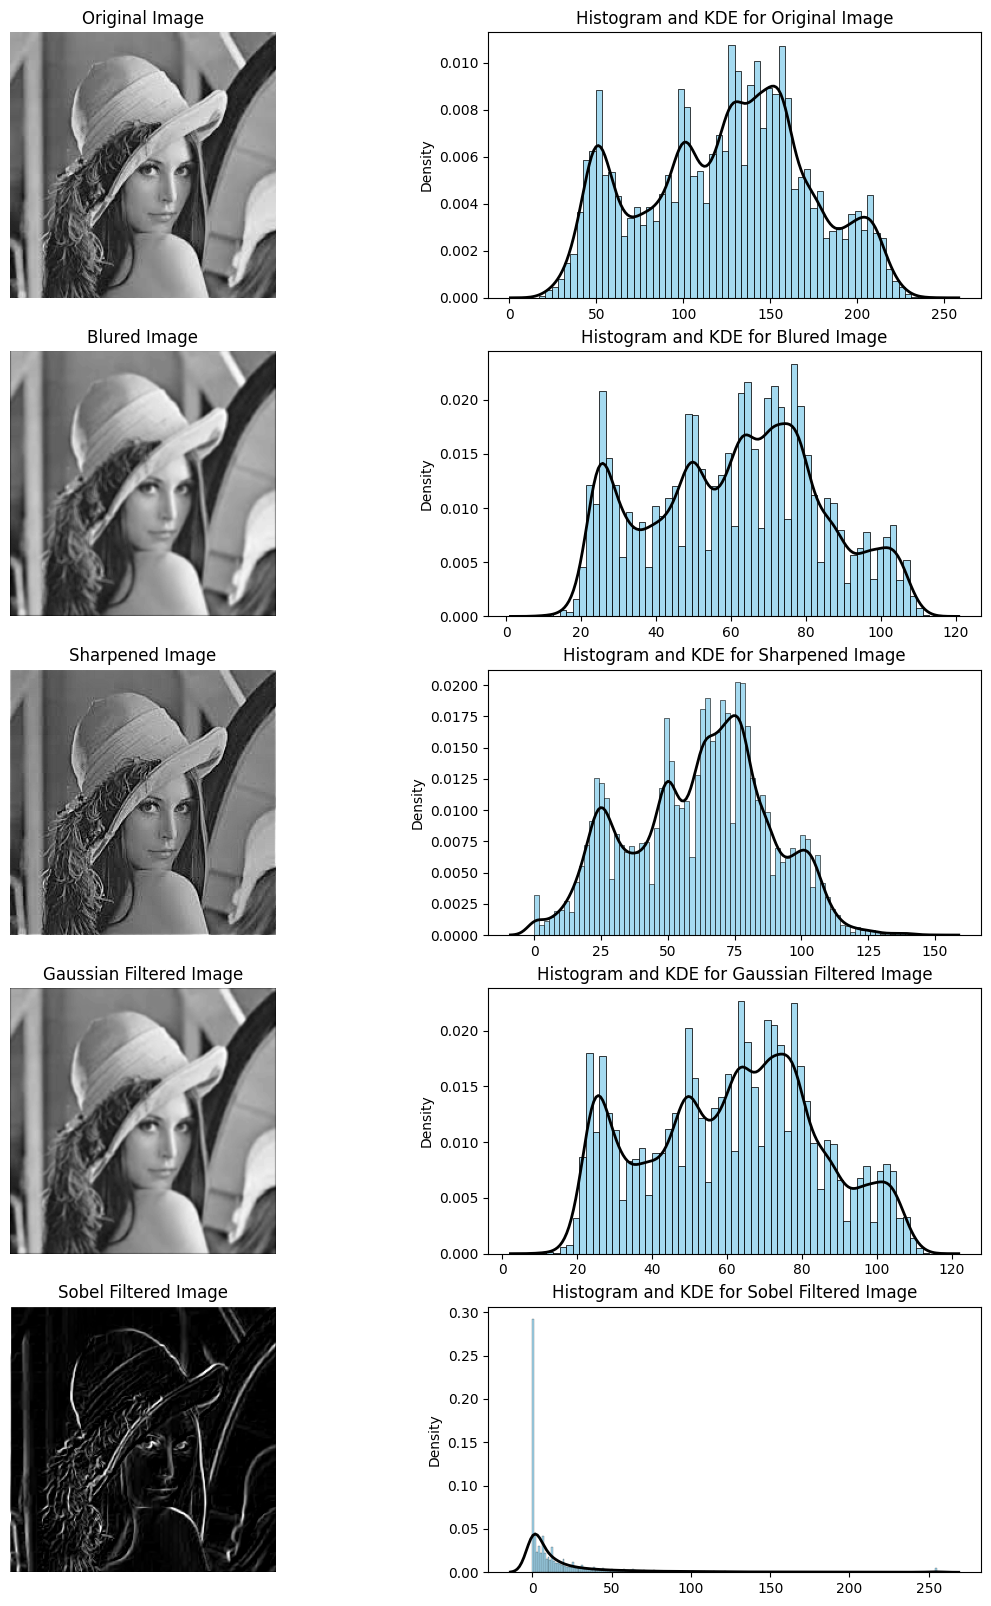

In [5]:
fig , axes= plt.subplots(5,2 , figsize = (14,20))

img_lst = [img ,linear_filters(img,'blur') ,linear_filters(img,'sharp') , linear_filters(img,'Gaussian')  , Sobel_filter(img)]

title = ['Original' , 'Blured' , 'Sharpened' , 'Gaussian Filtered' , 'Sobel Filtered']

for i in range(5):
    axes[i,0].imshow(img_lst[i] , cmap='gray')
    axes[i,0].axis('off')
    axes[i,0].set_title(f'{title[i]} Image')
    sns.histplot(img_lst[i].ravel() , kde = False  , ax=axes[i,1] , color='skyblue' , stat='density')
    sns.kdeplot(img_lst[i].ravel()  , linewidth=2 , color='black' , ax=axes[i,1]  )
    axes[i,1].set_title(f'Histogram and KDE for {title[i]} Image')

In [6]:
def histogram_shift(img , shift):

    img_ = img.copy().astype(np.int16)
    h,w = img.shape

    for i in range(h):
        for j in range(w):
            img_[i,j] =max(0 , min(img_[i,j]+shift , 255)) 
    return img_.astype(np.uint8)

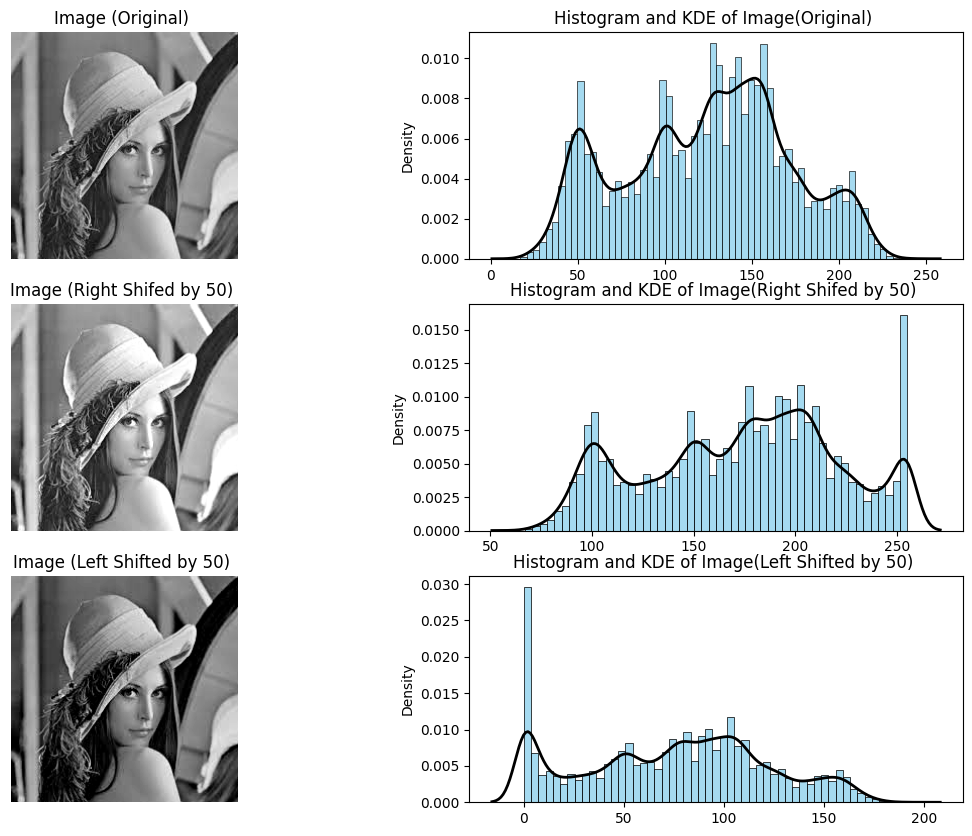

In [7]:
fig , axes= plt.subplots(3,2 , figsize = (14,10))

title= ['Original','Right Shifed by 50','Left Shifted by 50']

img_lst = [img , histogram_shift(img ,50) , histogram_shift(img ,-50)]

for i in [0,1 , 2]:
    axes[i,0].imshow(img_lst[i] , cmap='gray')
    axes[i,0].set_title(f'Image ({title[i]}) ')
    axes[i,0].axis('off')
    sns.kdeplot(img_lst[i].ravel()  , linewidth=2 , color='black' , ax=axes[i,1]  )
    sns.histplot(img_lst[i].ravel() , kde = False  , ax=axes[i,1]  ,stat='density' , color='skyblue')
    axes[i,1].set_title(f'Histogram and KDE of Image({title[i]}) ')


In [8]:
def bw_transform(img , val):
    bw_img = np.zeros_like(img)
    bw_img[img > val] = 255
    return bw_img

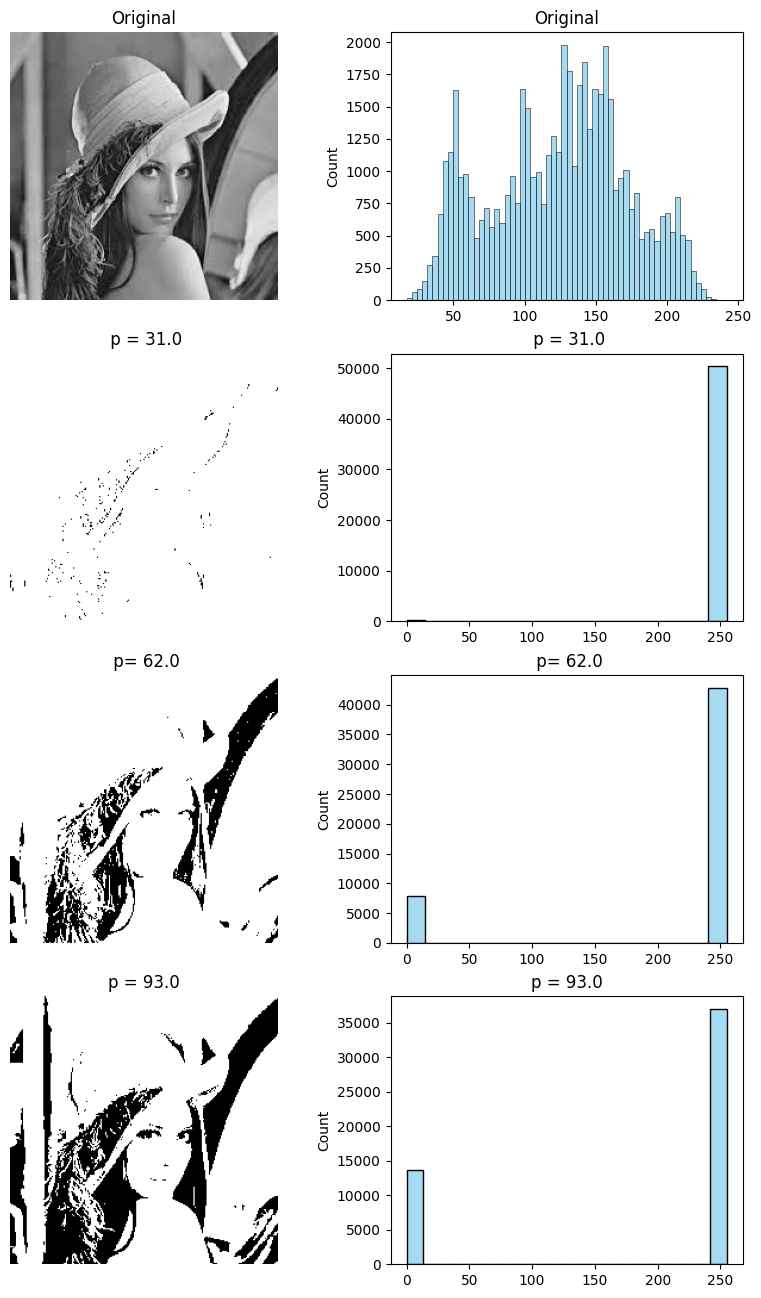

In [9]:
fig , axes = plt.subplots(4,2 , figsize = (10,16))

mean =np.round( np.mean(img))

lst = [img , bw_transform(img , mean/4) , bw_transform(img , mean/2) , bw_transform(img , 3*mean/4)]

title = ['Original',f' p = {mean//4}',f' p= {mean//2}',f'p = {3 *mean//4}']

for i in range(4):
    axes[i,0].imshow( lst[i] , cmap='gray')
    axes[i,0].set_title(title[i])
    axes[i,0].axis('off')
    sns.histplot(lst[i].ravel() , kde = False  , ax=axes[i,1] , color='skyblue')
    axes[i,1].set_title(title[i])

    

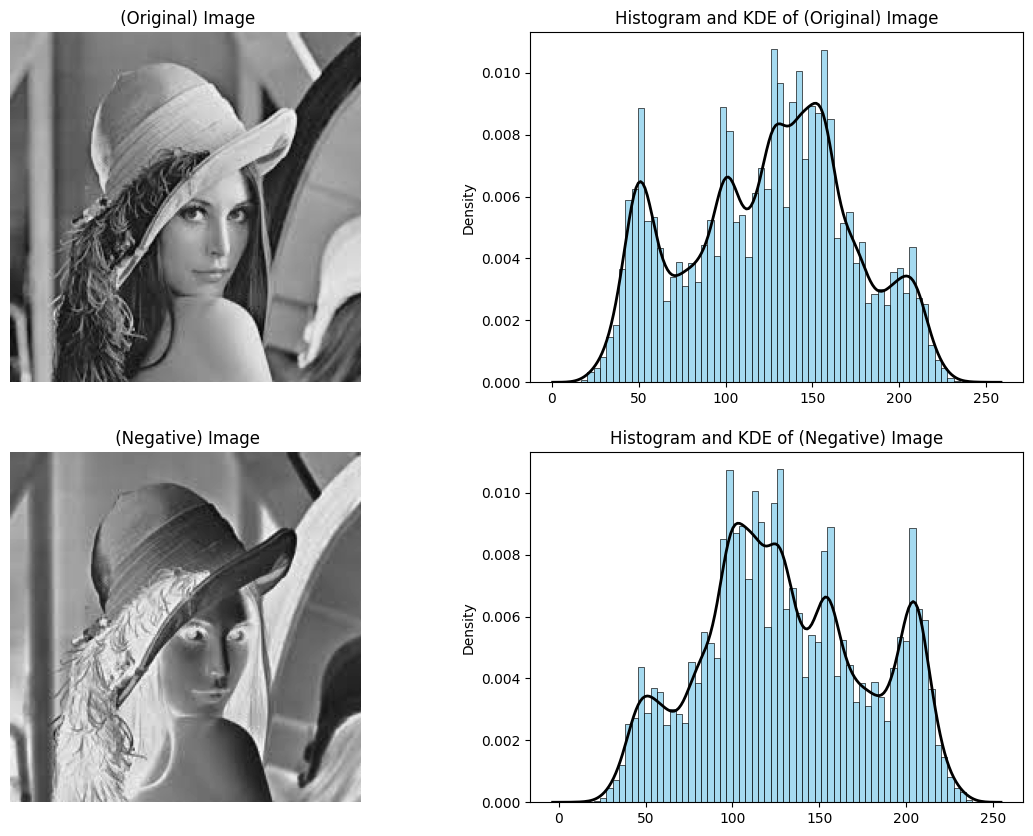

In [10]:
fig , axes= plt.subplots(2,2 , figsize = (14,10))

title= ['Original','Negative']


img_lst = [img , 255-img ]

for i in [0,1 ]:
    axes[i,0].imshow(img_lst[i] , cmap='gray')
    axes[i,0].set_title(f' ({title[i]}) Image')
    axes[i,0].axis('off')
    sns.kdeplot(img_lst[i].ravel()  , linewidth=2 , color='black' , ax=axes[i,1]  )
    sns.histplot(img_lst[i].ravel() , kde = False  , ax=axes[i,1]  ,stat='density' , color='skyblue')
    axes[i,1].set_title(f'Histogram and KDE of ({title[i]}) Image')


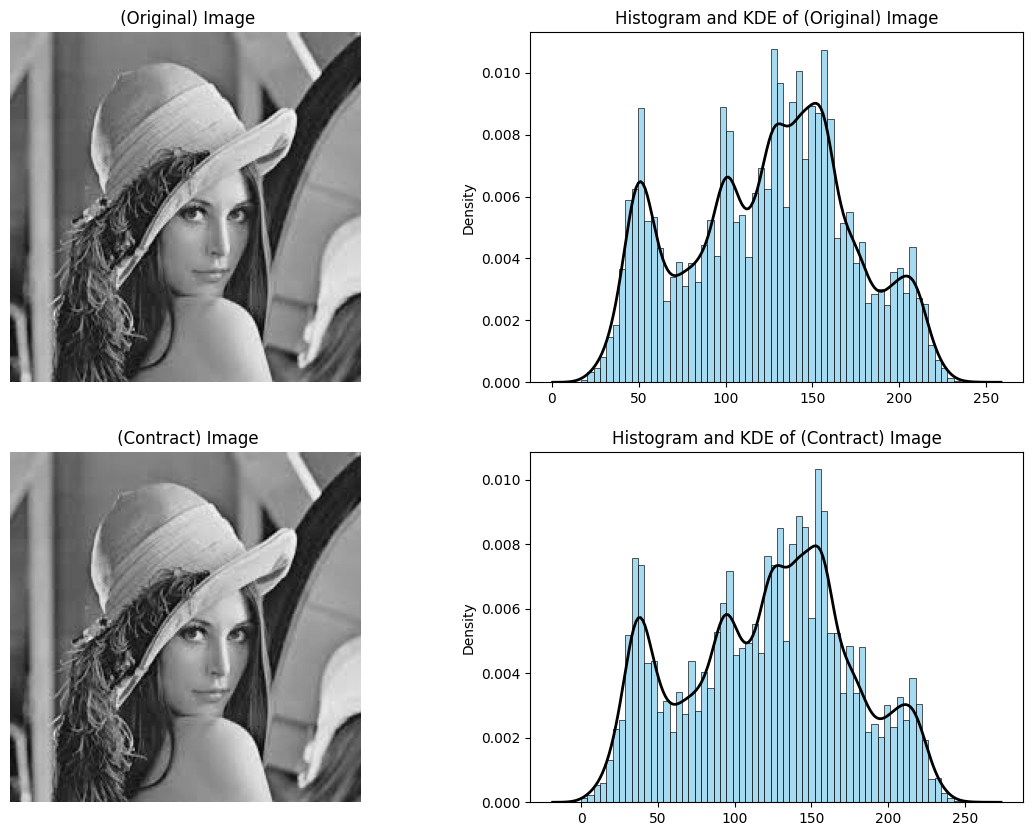

In [11]:
fig , axes= plt.subplots(2,2 , figsize = (14,10))

title= ['Original','Contract']

Min,Max = np.min(img),np.max(img)

contrast_img=img.copy().astype(np.int64)
contrast_img=(contrast_img-Min)*255/(Max-Min)
contrast_img=contrast_img.astype(np.uint8)


lst = [img , contrast_img]

for i in [0,1 ]:
    axes[i,0].imshow(lst[i] , cmap='gray')
    axes[i,0].set_title(f' ({title[i]}) Image')
    axes[i,0].axis('off')
    sns.kdeplot(lst[i].ravel()  , linewidth=2 , color='black' , ax=axes[i,1]  )
    sns.histplot(lst[i].ravel() , kde = False  , ax=axes[i,1]  ,stat='density' , color='skyblue')
    axes[i,1].set_title(f'Histogram and KDE of ({title[i]}) Image')
